In [1]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import math
from typing import Optional, List
import copy

import torch
from torch import nn, Tensor
from torchvision.models import resnet50, resnet101
import torchvision.transforms as T
import torch.nn.functional as F
torch.set_grad_enabled(False);

In [2]:
from models.backbone import Backbone
from models.encoder import EncoderModule

In [3]:
backbone = Backbone()
encoder = EncoderModule()

In [4]:
url = 'https://ogden_images.s3.amazonaws.com/www.timesrepublican.com/images/2019/05/02231710/Fox-WEB-1100x739.jpg'

im = Image.open(requests.get(url, stream=True).raw)

In [5]:
transform = T.Compose([
T.Resize((200,200)),
T.ToTensor(),
T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [6]:
def model_test(im, model):
    # mean-std normalize the input image (batch-size: 1)
    img = transform(im).unsqueeze(0)

    # propagate through the model
    outputs, pos = model(img)
    return outputs, pos

In [7]:
outputs, pos = model_test(im,backbone)

In [8]:
enc_out = encoder(src=outputs, pos_embed=pos)

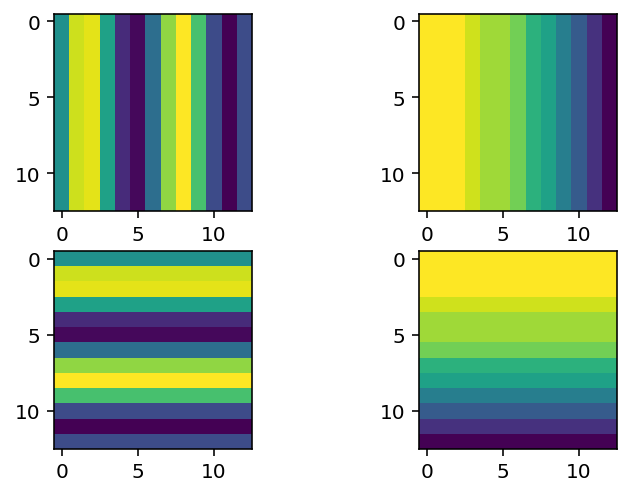

In [9]:
# 2D Visualization
# show 4 different dimensions of the positional encoding
plt.subplot(221)
plt.imshow(pos[0,0,:,:])
plt.subplot(222)
plt.imshow(pos[0,255,:,:])
plt.subplot(223)
plt.imshow(pos[0,256,:,:])
plt.subplot(224)
plt.imshow(pos[0,511,:,:])

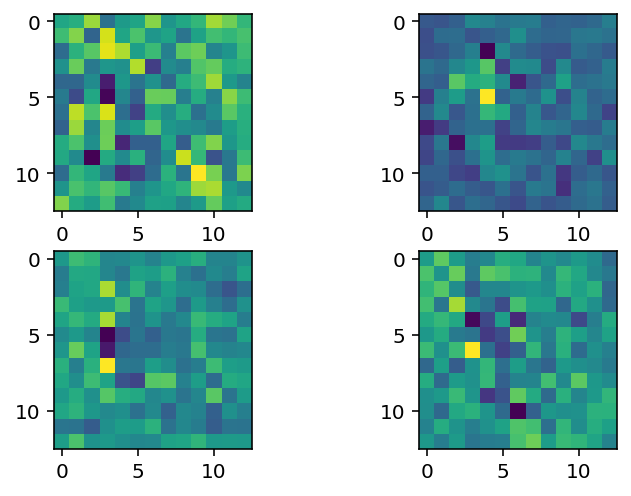

In [10]:
# 2D Visualization
# show 4 different dimensions of the backbone output
outputThreeD = outputs.squeeze(0)
plt.subplot(221)
plt.imshow(outputThreeD[0,:,:])
plt.subplot(222)
plt.imshow(outputThreeD[63,:,:])
plt.subplot(223)
plt.imshow(outputThreeD[64,:,:])
plt.subplot(224)
plt.imshow(outputThreeD[127,:,:])

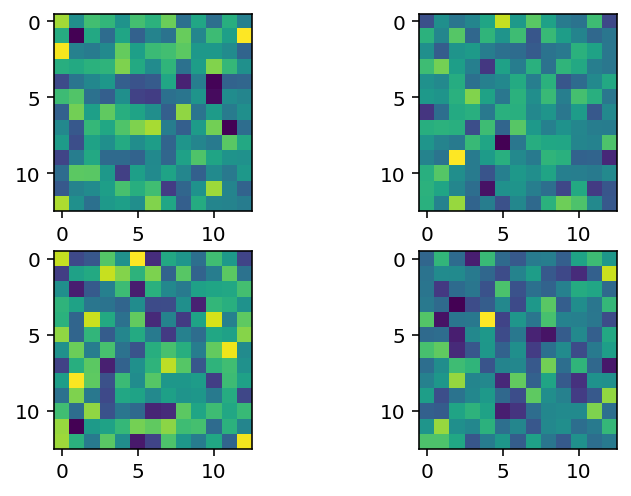

In [11]:
# 2D Visualization
# show 4 different dimensions of the encoder output
plt.subplot(221)
plt.imshow(enc_out[0,0,:,:])
plt.subplot(222)
plt.imshow(enc_out[0,255,:,:])
plt.subplot(223)
plt.imshow(enc_out[0,256,:,:])
plt.subplot(224)
plt.imshow(enc_out[0,511,:,:])